# **Installing and Importing needed Libraries while setting up the data path**

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Javascript
from base64 import b64decode
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from keras import models, layers, optimizers, utils, losses
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import save_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV library for image processing
from flask import Flask, request
from tensorflow.keras.callbacks import ModelCheckpoint
import imgcompare
import math
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation
from keras.models import save_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization, Activation, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import os
epochs=10

# **Preparing the Train/Validation data**


In [3]:
# Get the current working directory
current_dir = os.getcwd()

# Construct the paths relative to the current file
train_dir = os.path.join(current_dir, 'datasets', 'train')
val_dir = os.path.join(current_dir, 'datasets', 'test')

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(232,232),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(232,232),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')




Found 4181 images belonging to 3 classes.
Found 1047 images belonging to 3 classes.


# **Data Augmentation**


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
     fill_mode = 'nearest',
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Custom Convolutional Neural Network Construction and Training**


In [4]:
Custom_Model = Sequential()
Custom_Model.add(Conv2D(32, (3, 3), input_shape=(232, 232, 1), activation='relu'))
Custom_Model.add(MaxPooling2D(pool_size=(2, 2)))
Custom_Model.add(Conv2D(64, (3, 3), activation='relu'))
Custom_Model.add(MaxPooling2D(pool_size=(2, 2)))
Custom_Model.add(Conv2D(128, (3, 3), activation='relu'))
Custom_Model.add(MaxPooling2D(pool_size=(2, 2)))
Custom_Model.add(Flatten())
Custom_Model.add(Dense(units=128, activation='relu'))
Custom_Model.add(Dense(units=3, activation='softmax'))  
Custom_Model.summary()

Custom_Model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

fle_s='Custom_Model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 230, 230, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 115, 115, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 128)      

# **Training the Model**

In [6]:
callback_list=[checkpointer]

history = Custom_Model.fit(
    train_generator,
    steps_per_epoch=len(train_generator)//8
    ,epochs=epochs,shuffle=True,callbacks=[callback_list],
    validation_data=validation_generator,
    validation_steps=len(validation_generator.classes)
)

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 1.1268 - accuracy: 0.4136WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1047 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: loss improved from inf to 1.12682, saving model to Custom_Model.h5


c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 11s 1s/step - loss: 1.1268 - accuracy: 0.4136 - val_loss: 0.9850 - val_accuracy: 0.4279
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.7728 - accuracy: 0.7305
Epoch 2: loss improved from 1.12682 to 0.77281, saving model to Custom_Model.h5
8/8 [==============================] - 8s 1s/step - loss: 0.7728 - accuracy: 0.7305
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.7910
Epoch 3: loss improved from 0.77281 to 0.48550, saving model to Custom_Model.h5
8/8 [==============================] - 9s 1s/step - loss: 0.4855 - accuracy: 0.7910
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.9121
Epoch 4: loss improved from 0.48550 to 0.25300, saving model to Custom_Model.h5
8/8 [==============================] - 9s 1s/step - loss: 0.2530 - accuracy: 0.9121
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 0.2893 - accuracy: 0.9004
Epoch 5: loss

# **Model Evaluation**

In [8]:

test_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(232, 232),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred =Custom_Model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 1047 images belonging to 3 classes.


17/17 [==============================] - 3s 191ms/step
Test Accuracy: 90.54%


# **Training VS Validation Accuracy**

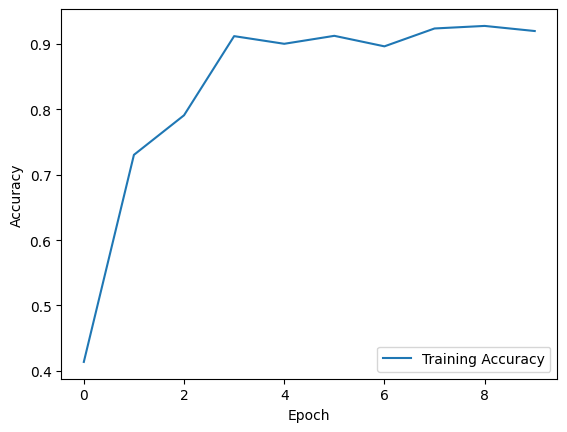

In [9]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

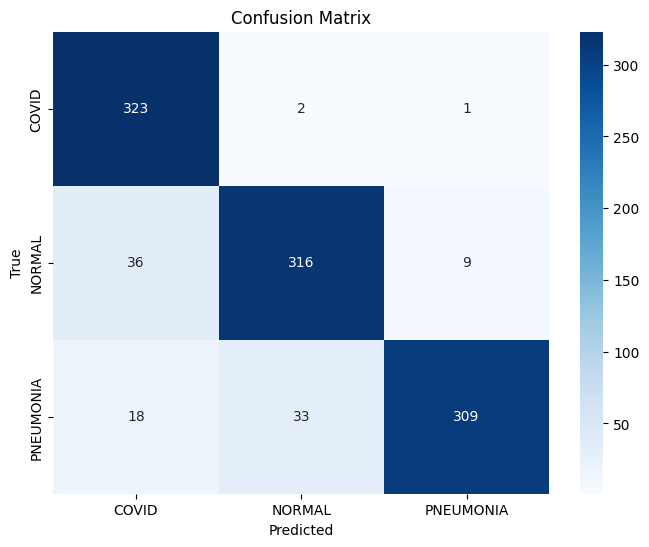

In [10]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [11]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       COVID       0.86      0.99      0.92       326
      NORMAL       0.90      0.88      0.89       361
   PNEUMONIA       0.97      0.86      0.91       360

    accuracy                           0.91      1047
   macro avg       0.91      0.91      0.91      1047
weighted avg       0.91      0.91      0.91      1047



# **ROC Curves**

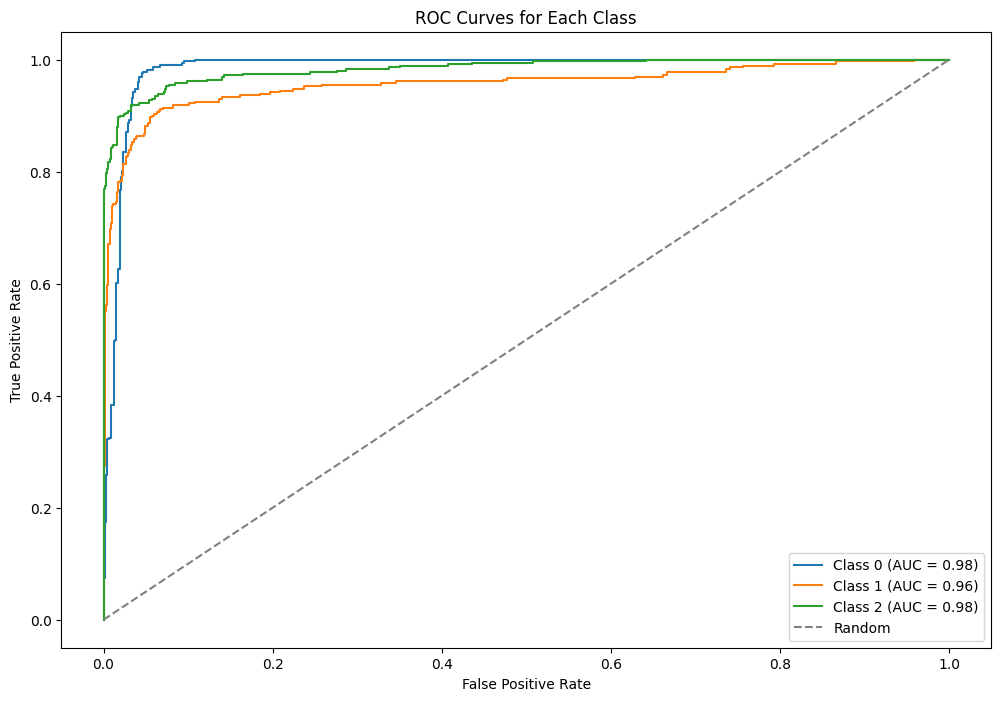

In [13]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Dense Convolutional Neural Network Construction and Training**


In [19]:

input_layer = Input(shape=(232, 232, 1))
x = input_layer

for _ in range(3):
    conv = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Concatenate()([x, conv])
    x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(units=128, activation='relu')(x)
output_layer = Dense(units=3, activation='softmax')(x)
Dense_Model = Model(inputs=input_layer, outputs=output_layer)
Dense_Model.summary()

Dense_Model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

file_s = 'Dense_Model.h5'
checkpointer = ModelCheckpoint(file_s, monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, save_freq='epoch')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 232, 232, 1)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 232, 232, 32)         320       ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 232, 232, 33)         0         ['input_1[0][0]',             
                                                                     'conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 116, 116, 33)         0         ['concatenate[0][0]']     

# **Training the Model**

In [21]:
callback_list=[checkpointer]


historyDense = Dense_Model.fit(
        train_generator,
    steps_per_epoch=len(train_generator)//8,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.classes),
epochs=epochs,
    shuffle=True,
    callbacks=[callback_list])


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.8578 - accuracy: 0.5684WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1047 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: loss improved from inf to 0.85783, saving model to Dense_Model.h5
8/8 [==============================] - 14s 2s/step - loss: 0.8578 - accuracy: 0.5684 - val_loss: 0.6112 - val_accuracy: 0.7221
Epoch 2/10


c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: 0.4242 - accuracy: 0.8457
Epoch 2: loss improved from 0.85783 to 0.42423, saving model to Dense_Model.h5
8/8 [==============================] - 9s 1s/step - loss: 0.4242 - accuracy: 0.8457
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.3075 - accuracy: 0.8848
Epoch 3: loss improved from 0.42423 to 0.30748, saving model to Dense_Model.h5
8/8 [==============================] - 8s 998ms/step - loss: 0.3075 - accuracy: 0.8848
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.2973 - accuracy: 0.8809
Epoch 4: loss improved from 0.30748 to 0.29731, saving model to Dense_Model.h5
8/8 [==============================] - 7s 913ms/step - loss: 0.2973 - accuracy: 0.8809
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 0.2920 - accuracy: 0.8965
Epoch 5: loss improved from 0.29731 to 0.29202, saving model to Dense_Model.h5
8/8 [==============================] - 7s 902ms/step - loss: 0.2920 -

# **Model Evaluation**

In [22]:

test_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(232, 232),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = Dense_Model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 1047 images belonging to 3 classes.


17/17 [==============================] - 4s 239ms/step
Test Accuracy: 89.40%


# **Training VS Validation Accuracy**

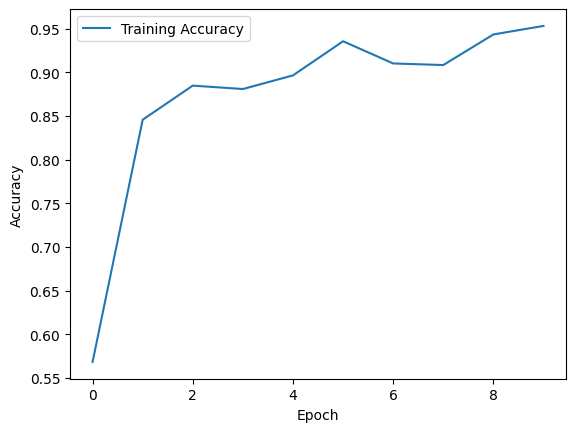

In [23]:

plt.plot(historyDense.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

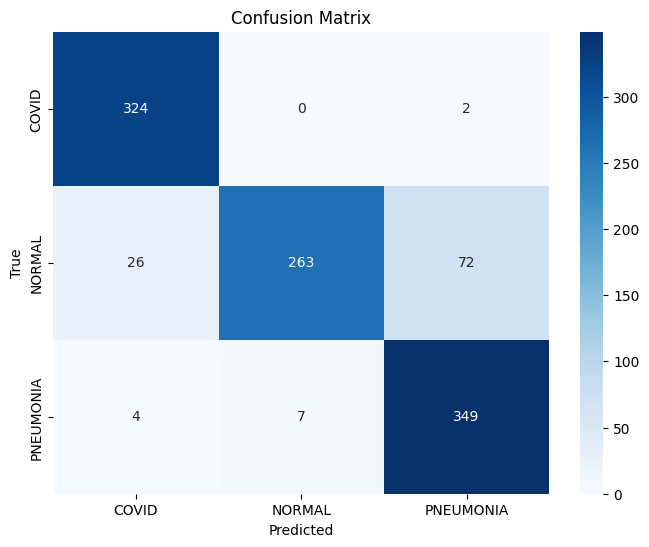

In [24]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [25]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       COVID       0.92      0.99      0.95       326
      NORMAL       0.97      0.73      0.83       361
   PNEUMONIA       0.83      0.97      0.89       360

    accuracy                           0.89      1047
   macro avg       0.90      0.90      0.89      1047
weighted avg       0.90      0.89      0.89      1047



# **ROC Curves**

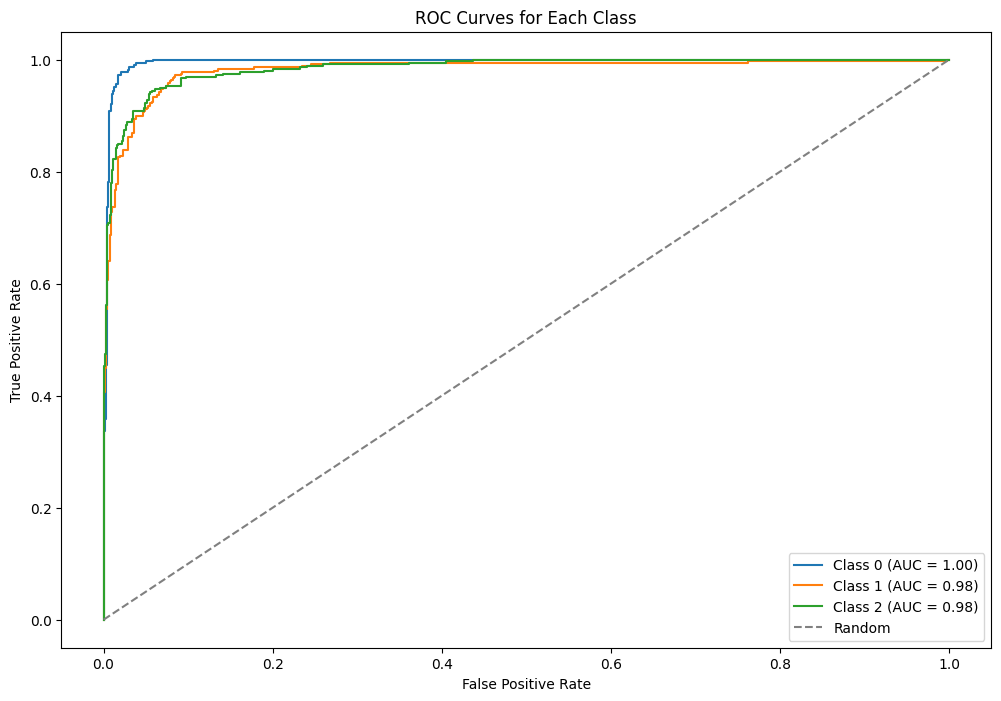

In [26]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **GoogleNet Convolutional Neural Network Construction and Training**


In [31]:

def InceptionModule(x, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3)
    conv5x5 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv5x5)
    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)
    inception = Concatenate(axis=-1)([conv1x1, conv3x3, conv5x5, maxpool])
    return inception

input_layer = Input(shape=(232, 232, 1))

x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = InceptionModule(x, [64, 128, 128, 32, 32, 32])
x = InceptionModule(x, [128, 192, 192, 96, 96, 96])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
output_layer = Dense(units=3, activation='softmax')(x)

Googlenet_model = Model(inputs=input_layer, outputs=output_layer)

Googlenet_model.summary()

Googlenet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

fle_s='Googlenet_Model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 232, 232, 1)]        0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 116, 116, 64)         3200      ['input_5[0][0]']             
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 58, 58, 64)           0         ['conv2d_27[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_29 (Conv2D)          (None, 58, 58, 128)          8320      ['max_pooling2d_12[0][0]

# **Training the Model**

In [32]:
callback_list=[checkpointer]


historyGooglenet = Googlenet_model.fit(
        train_generator,
    steps_per_epoch=len(train_generator)//8,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.classes),
epochs=epochs,
    shuffle=True,
    callbacks=[callback_list])


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 4.2551 - accuracy: 0.4297WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1047 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: loss improved from inf to 4.25507, saving model to Googlenet_Model.h5


c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 52s 6s/step - loss: 4.2551 - accuracy: 0.4297 - val_loss: 0.8006 - val_accuracy: 0.6686
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.7695
Epoch 2: loss improved from 4.25507 to 0.66664, saving model to Googlenet_Model.h5
8/8 [==============================] - 38s 5s/step - loss: 0.6666 - accuracy: 0.7695
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.4963 - accuracy: 0.7734
Epoch 3: loss improved from 0.66664 to 0.49630, saving model to Googlenet_Model.h5
8/8 [==============================] - 37s 5s/step - loss: 0.4963 - accuracy: 0.7734
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.3488 - accuracy: 0.8828
Epoch 4: loss improved from 0.49630 to 0.34881, saving model to Googlenet_Model.h5
8/8 [==============================] - 37s 5s/step - loss: 0.3488 - accuracy: 0.8828
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 0.2577 - accuracy: 0.8965
E

# **Model Evaluation**

In [33]:
test_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(232, 232),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = Googlenet_model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 1047 images belonging to 3 classes.


17/17 [==============================] - 16s 919ms/step
Test Accuracy: 90.74%


# **Training VS Validation Accuracy**

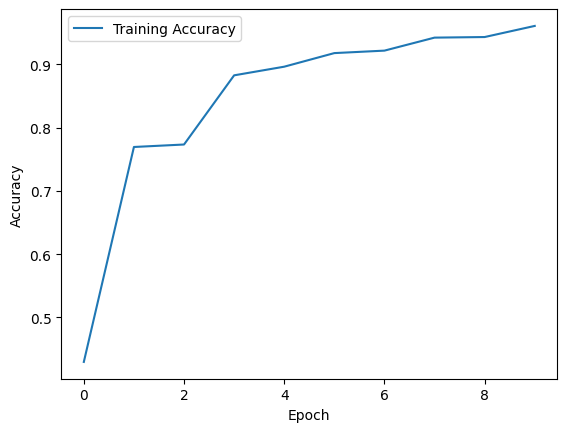

In [34]:

plt.plot(historyGooglenet.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

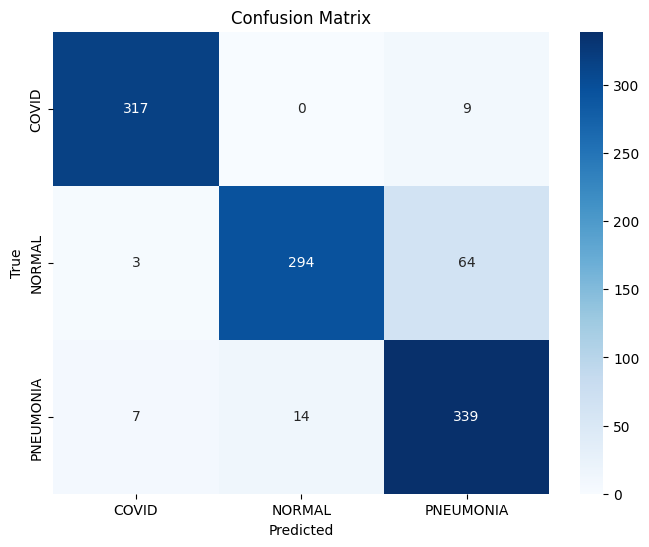

In [35]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [36]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       COVID       0.97      0.97      0.97       326
      NORMAL       0.95      0.81      0.88       361
   PNEUMONIA       0.82      0.94      0.88       360

    accuracy                           0.91      1047
   macro avg       0.92      0.91      0.91      1047
weighted avg       0.91      0.91      0.91      1047



# **ROC Curves**

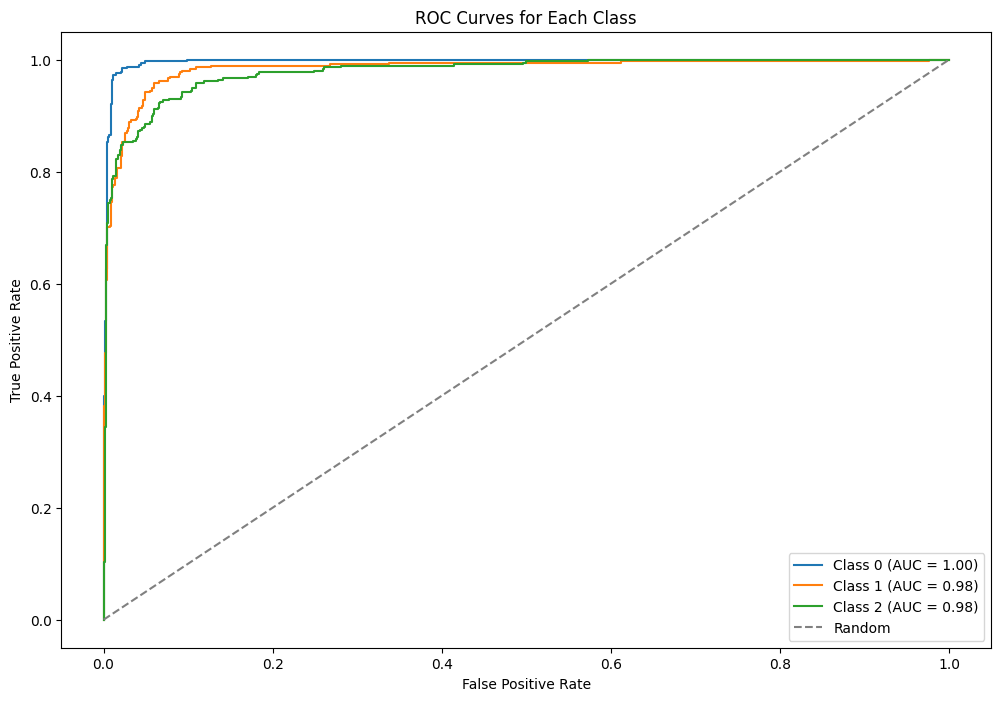

In [37]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Create Endpoints For Live CAM**

In [7]:

def predict_Sickness(model_path, img_path, confidence_threshold=0.5):
    if not os.path.isfile(model_path):
        print(f"Error: Model file '{model_path}' not found.")
        return None

    loaded_model = load_model(model_path)

    if not os.path.isfile(img_path):
        print(f"Error: Image file '{img_path}' not found.")
        return None

    input_size = 232  

    img_color = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (input_size, input_size))
    img_array = np.expand_dims(img_gray, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0 

    predictions = loaded_model.predict(img_array)

    state_labels = ['COVID', 'NORMAL', 'PNEUMONIA']
    predicted_state_index = np.argmax(predictions)
    predicted_state = state_labels[predicted_state_index]
    confidence=predictions[0][predicted_state_index]
    
    if confidence >= confidence_threshold:
        print(f"Predicted Patient State: {predicted_state} with confidence: {confidence:.2%}")
    else:
        print(f"Prediction confidence below threshold ({confidence_threshold:.2%}). Prediction result may not be reliable.")

    return predicted_state,confidence






app = Flask(__name__)

# Get the current working directory
current_dir = os.getcwd()

# Construct the paths relative to the current file
imagePath=train_dir = os.path.join(current_dir, 'datasets', 'train','PNEUMONIA','PNEUMONIA_95.png')

# Construct the paths relative to the current file
modelPath=train_dir = os.path.join(current_dir, 'datasets', 'Models', 'Custom_Model.h5')



@app.route('/Custom', methods=['GET'])
def faceCustom():
    predicted_state,confidence = predict_Sickness(modelPath,imagePath,0.8)
    if(confidence>0.6):
        return f"Predicted Patient State: {predicted_state} with confidence: {confidence:.2%}"
    else:
        return "Not Sure!"

if __name__ == '__main__':
    app.run(port=5000)






 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 429ms/step


127.0.0.1 - - [07/Dec/2023 12:00:22] "GET /Custom HTTP/1.1" 200 -


Predicted Patient State: PNEUMONIA with confidence: 98.98%
